<a href="https://colab.research.google.com/github/KrisSandy/ExMachineLearning/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression

### Hypothesis


$h_\theta(x) = \theta^Tx = \theta_0  + \theta_1x_1 + ...$

In [0]:
def predict(X, theta):
  y_predicted = np.matmul(X, theta)
  return y_predicted

### Cost Function

$J(\theta) = \frac{1}{m}\displaystyle\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^2$

##### *Vectorized form* 

$J(\theta) = \frac{1}{2m}(X\theta - \overrightarrow{y})^T(X\theta - \overrightarrow{y})$

##### *Implementation* 
Below compute_cost function implements a vectorized form of cost function. As vector of X is represented as a matrix with one observation in one row and columns representing the parameters. Below function adds a dummy parameter $x_0$ so that matrix multiplication can be performed with $\theta$ vector with parameters ${\theta_0, \theta_1, ...}$

In [0]:
import numpy as np

def compute_cost(X, y, theta):
  m=len(y)
  xt = np.matmul(X, theta)
  e = xt-y
  J_theta = (1/(2*m))*np.matmul(np.transpose(e), e)
  return J_theta

### Gradient Decent

$\theta_j := \theta_j - \alpha\frac{1}{m}\displaystyle\sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} $

##### *Vectorized form* 

$\theta_j := \theta_j - \frac{\alpha}{m}X^T(X\theta - \overrightarrow{y})$

In [0]:
def gradient_decent(X, y, theta, aplha, num_iter):
  m=len(y)
  J_theta_hist = np.array(np.zeros((num_iter)))
  for i in range(0, num_iter):
    xt = np.matmul(X, theta)
    e = xt-y
    theta = theta - (aplha/m)*np.matmul(np.transpose(X), e)
    J_theta_hist[i] = compute_cost(X, y, theta)
  return theta, J_theta_hist

## Single variable - Predicting Profit

This dataset is an example for single variable linear regression. It has two fields, population and profit. In this below implementation, we will be constructing a Linear regression model to redict profit based on population. 

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
data = pd.read_csv(r'/content/gdrive/My Drive/Coursera/Machine Learning/ex1data1.txt',
                  header=None)
data.columns = ['population', 'profit']
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


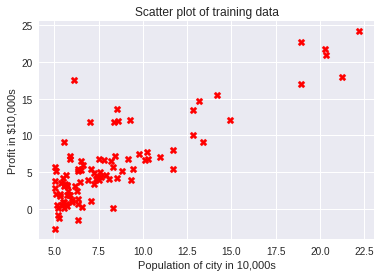

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(data['population'], data['profit'], c='r', marker='X')
plt.xlabel("Population of city in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.title("Scatter plot of training data");

In [0]:
X = data['population']
X = pd.DataFrame(X)
X.insert(loc=0, column='x0', value=1)
y = data['profit']

#### Finding Cost



In [0]:
theta = np.array(np.zeros(2))
print(compute_cost(X, y, theta))

32.072733877455676


#### Optimising theta

In [0]:
aplha = 0.01
num_iter = 2000
theta = np.array(np.zeros(2))
optimised_theta, J_theta_hist = gradient_decent(X, y, theta, aplha, num_iter)
print(optimised_theta)

[-3.78806857  1.18221277]


#### Predicting for new cities

In [0]:
print("Predicted profit for a city with population 35,000 is {}".format(predict([1, 3.5], optimised_theta)*10000))
print("Predicted profit for a city with population 70,000 is {}".format(predict([1, 7], optimised_theta)*10000))

Predicted profit for a city with population 35,000 is 3496.7613892770855
Predicted profit for a city with population 70,000 is 44874.20850578529


#### Cost vs Number of iterations

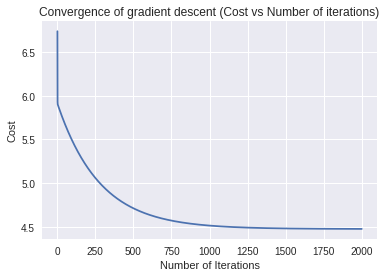

In [0]:
plt.plot(range(1,num_iter+1), J_theta_hist)
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.title("Convergence of gradient descent (Cost vs Number of iterations)");

#### Plotting Linear Regression function

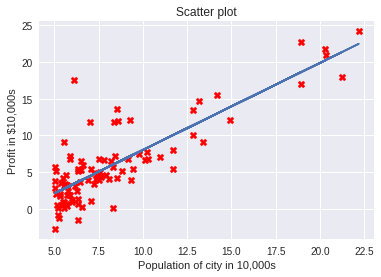

In [0]:
plt.scatter(data['population'], data['profit'], c='r', marker='X')
plt.xlabel("Population of city in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.title("Scatter plot")
plt.plot(data['population'].values, predict(X, optimised_theta), '-');

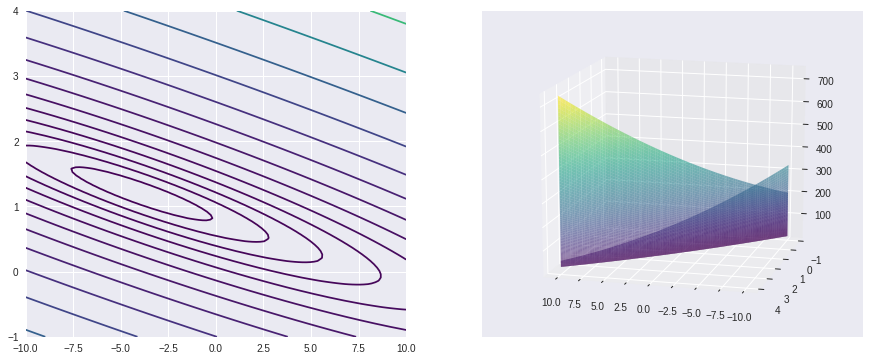

In [0]:
from mpl_toolkits.mplot3d import Axes3D

t0 = np.linspace(-10, 10, 100)
t1 = np.linspace(-1, 4, 100)
xv, yv = np.meshgrid(t0, t1)
J = np.zeros((t0.size, t1.size))

for index, x in np.ndenumerate(J):
  t = [xv[index],yv[index]]
  J[index] = compute_cost(X, y, t)

fig = plt.figure(figsize=(15,6))
plt1 = fig.add_subplot(121)
plt1.contour(t0, t1, J, np.logspace(-2, 3, 30), cmap='viridis');
plt2 = fig.add_subplot(122, projection='3d')
plt2.plot_surface(t0, t1, J, rstride=1, cstride=1, alpha=0.6, cmap='viridis')
plt2.view_init(elev=15, azim=105)

#### Impact of changing Learning Rate

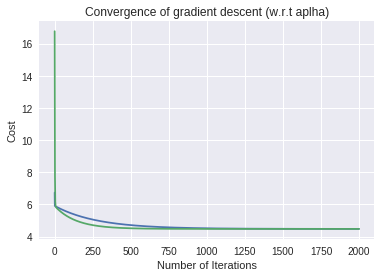

In [0]:
aplha = 0.01
num_iter = 2000
theta = np.array(np.zeros(2))
_, J1 = gradient_decent(X, y, theta, aplha, num_iter)

aplha = 0.02
theta = np.array(np.zeros(2))
_, J2 = gradient_decent(X, y, theta, aplha, num_iter)

plt.plot(range(1,num_iter+1), J1)
plt.plot(range(1,num_iter+1), J2)
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.title("Convergence of gradient descent (w.r.t aplha)");

## Multi Variable Linear Regression

In [0]:
import pandas as pd
datam = pd.read_csv(r'/content/gdrive/My Drive/Coursera/Machine Learning/ex1data2.txt',
                  header=None)
datam.columns = ['size', 'bedrooms', 'price']
datam.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


#### Normalizing Data

From the data, its evident that each column has different range of data and data ranges vary a lot from column to column. Hence in order to reduce the impact of huge numbers (square feet) on the small numbers like bedrooms, we need to scale the data. 

We an use z-normalization in which we scale the data such that mean of the entire column becomes zero by using below formula for each value

$x_i^{'} = \frac{x_i- \mu}{\sigma}$

In [0]:
from sklearn import preprocessing

aplha = 0.02
num_iter = 400
X = datam.drop(columns=['price'])
y = datam['price']
mu = []
std = []
for i in range(0, len(X.columns)):
  mu.append(X.iloc[:,i].mean())
  std.append(X.iloc[:,i].std())
X_norm = preprocessing.scale(X)
X_norm = pd.DataFrame(X_norm)
X_norm.insert(loc=0, column='x0', value=1)

theta = np.array(np.zeros(X_norm.shape[1]))
optimised_theta, J_theta_hist = gradient_decent(X_norm, y, theta, aplha, num_iter)
print(optimised_theta)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  if sys.path[0] == '':


[340307.35772969 107757.47433209  -4888.35338493]


In [0]:
X_test = np.array([[1650.0, 3.0]])
for i, row in enumerate(X_test):
  for j, col in enumerate(row):
    X_test.itemset((i, j), (col-mu[j])/std[j])

X_test_norm = pd.DataFrame(X_test)
X_test_norm.insert(loc=0, column='x0', value=1)
print("Predicted house price for a house with size 1650 sq.ft and 3 bedroom is {}".format(predict(X_test_norm, optimised_theta)[0]))

Predicted house price for a house with size 1650 sq.ft and 3 bedroom is 293850.2755015123


##Normal Equation

All the above tasks of feature scaling, gradient descent etc to find theta can be done in one equation shown below

$\theta = (X^TX)^{-1}X^T\overrightarrow{y}$

In [0]:
X = datam.drop(columns=['price'])
y = datam['price']
X.insert(loc=0, column='x0', value=1)
Xt = np.transpose(X)
normal_theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(Xt, X)), Xt), y.values)
normal_theta

array([89597.9095428 ,   139.21067402, -8738.01911233])

In [0]:
X=np.array([[1, 1650.0, 3.0]])
print("Predicted house price for a house with size 1650 sq.ft and 3 bedroom is {}".format(predict(X, normal_theta)[0]))

Predicted house price for a house with size 1650 sq.ft and 3 bedroom is 293081.4643348959


In [0]:
X

,x0,size,bedrooms
0,1,2104,3
1,1,1600,3
2,1,2400,3
3,1,1416,2
4,1,3000,4
5,1,1985,4
6,1,1534,3
7,1,1427,3
8,1,1380,3
9,1,1494,3
